In [47]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
Table = pd.read_csv('unsupervise.csv')

In [49]:
Table

,one,two,three,four,five
0,0.698381,-0.882347,-0.235656,0.193847,-0.496219
1,0.638863,0.087218,0.856593,-1.576665,0.617569
2,-0.777021,-0.102452,-1.037489,-0.167750,-0.746777
3,0.375982,-0.313393,0.066893,-1.493809,-0.073505
4,1.542086,0.214434,2.072326,2.364854,1.495367
...,...,...,...,...,...
4995,-2.120785,3.545910,1.754339,0.202291,2.544950
4996,-2.492084,4.128219,2.015334,-2.233131,2.944390
4997,0.898252,-1.278728,-0.475556,0.480146,-0.810583
4998,-0.449152,0.099312,-0.409664,-1.908453,-0.241738


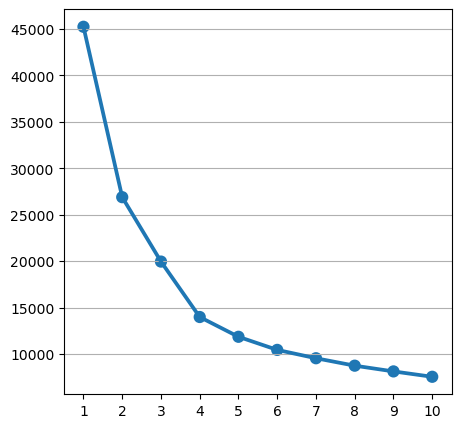

In [50]:
# code to determine the number of cluster to group data into
elbow = {} # empty dictionary
for i in range(1, 11): # iterate from one to 10 to determine number that fit
    model = KMeans(n_clusters=i)
    model = model.fit(Table)
    elbow[i] = model.inertia_
keys =list(elbow.keys())
values=list(elbow.values())
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(True)
sns.pointplot(x=keys, y=values, ax=ax)
plt.show()
    

#  Note: the best cluster to plot is where the elbow starts to bend i.e at 4 in the chart above

In [51]:
# to convert it to list
keys =list(elbow.keys())

# Build the Model using 4_cluster

In [52]:
model = KMeans(n_clusters=4, random_state =42)

model = model.fit(Table)

In [53]:
# predict the class/group
prediction= model.predict(Table)

In [54]:
Table['cluster']= prediction

In [55]:
# To rename the group
Table['cluster'].replace([0,1,2,3], ['group one', 'group two', 'group three', 'group four'], inplace=True)

In [56]:
Table

,one,two,three,four,five,cluster
0,0.698381,-0.882347,-0.235656,0.193847,-0.496219,group three
1,0.638863,0.087218,0.856593,-1.576665,0.617569,group one
2,-0.777021,-0.102452,-1.037489,-0.167750,-0.746777,group two
3,0.375982,-0.313393,0.066893,-1.493809,-0.073505,group one
4,1.542086,0.214434,2.072326,2.364854,1.495367,group one
...,...,...,...,...,...,...
4995,-2.120785,3.545910,1.754339,0.202291,2.544950,group four
4996,-2.492084,4.128219,2.015334,-2.233131,2.944390,group four
4997,0.898252,-1.278728,-0.475556,0.480146,-0.810583,group three
4998,-0.449152,0.099312,-0.409664,-1.908453,-0.241738,group two


In [57]:
Table['cluster'].value_counts()

group one      1640
group three    1491
group two      1078
group four      791
Name: cluster, dtype: int64

In [58]:
X = Table.copy()
y = X.pop("cluster")

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 42)

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

In [61]:
prediction=model.predict(x_val)

In [62]:
prediction

array(['group one', 'group one', 'group two', 'group two', 'group one',
       'group two', 'group four', 'group three', 'group four',
       'group two', 'group four', 'group four', 'group two', 'group four',
       'group one', 'group one', 'group two', 'group three', 'group two',
       'group three', 'group three', 'group one', 'group one',
       'group four', 'group four', 'group three', 'group one',
       'group four', 'group one', 'group three', 'group two',
       'group three', 'group one', 'group one', 'group one', 'group one',
       'group four', 'group one', 'group one', 'group one', 'group three',
       'group four', 'group four', 'group three', 'group four',
       'group two', 'group three', 'group four', 'group three',
       'group one', 'group one', 'group one', 'group three',
       'group three', 'group three', 'group three', 'group three',
       'group one', 'group three', 'group two', 'group four',
       'group four', 'group four', 'group three', 'group one'